In [1]:
import tensorflow as tf

from keras import layers
from keras.models import Sequential
from keras.layers import preprocessing
from keras.utils import plot_model


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import time
import itertools
import shutil

from sklearn.metrics import confusion_matrix

In [2]:
random_state_global = 42
epoch_val = 1000
batch_size_val = 32
threshold_val = 1e-4
IMG_SIZE = (224, 224)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dir =  'chest_xray/train'
test_dir =  'chest_xray/test'
val_dir =  'chest_xray/val'


train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=True)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
print(train_ds)

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle test data for prediction analysis
valid_ds = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle valid data for prediction analysis

class_names = valid_ds.class_names
print(f'\nclass names are {class_names}')


Found 5102 files belonging to 2 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>
Found 624 files belonging to 2 classes.
Found 130 files belonging to 2 classes.

class names are ['NORMAL', 'PNEUMONIA']


In [3]:
# stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
#                                                   patience=1,
#                                                   min_delta=threshold_val,
#                                                   mode='min',
#                                                   restore_best_weights=False, 
#                                                   verbose=1)

my_callbacks = [
            tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, min_delta=1e-4,mode="min",restore_best_weights=False,verbose=1),
            tf.keras.callbacks.ModelCheckpoint(filepath='models/model.{epoch:02d}-{val_loss:.2f}.h5'),
            tf.keras.callbacks.TensorBoard(log_dir='./logs')]

### Architecture-1

In [4]:
tf.random.set_seed(random_state_global)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  
  tf.keras.layers.Conv2D(filters=8, kernel_size=11, strides=4, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
  
  tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  
  tf.keras.layers.Dense(2, activation="softmax") # binary activation output
], name="model_1")

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_ds,
                        epochs=epoch_val,
                        validation_data=valid_ds,
                        callbacks = my_callbacks,
                        verbose=0)

Epoch 18: early stopping


### Architecture-2

In [5]:
tf.random.set_seed(random_state_global)

model_2 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  
  tf.keras.layers.Conv2D(filters=8, kernel_size=11, strides=4, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
  
  tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
  
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  
  tf.keras.layers.Dense(2, activation="softmax") # binary activation output
], name="model_2")

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])


# Fit the model
history_2 = model_2.fit(train_ds,
                        epochs=epoch_val,
                        validation_data=valid_ds,
                        callbacks = my_callbacks,
                        verbose=0)


Epoch 29: early stopping


### Architecture-3

In [6]:
tf.random.set_seed(random_state_global)

model_3 = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  
  tf.keras.layers.Conv2D(filters=8, kernel_size=11, strides=4, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
  
  tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),
  
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation="relu"),

  tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=3, strides=2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  
  tf.keras.layers.Dense(2, activation="softmax") # binary activation output
], name="model_3")

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])


# Fit the model
history_3 = model_3.fit(train_ds,
                        epochs=epoch_val,
                        validation_data=valid_ds,
                        callbacks = my_callbacks,
                        verbose=0)

Epoch 25: early stopping


### Testing Architecture-1 
on validation and test data . 

In [7]:
test_loss, test_accuracy = model_1.evaluate(test_ds ,  batch_size=None, verbose="auto", callbacks=None)
print(test_loss)
print(test_accuracy)

val_loss, val_accuracy = model_1.evaluate(valid_ds ,  batch_size=None, verbose="auto", callbacks=None)
print(val_loss)
print(val_accuracy)


20/20 [==============================] - 4s 209ms/step - loss: 91.4349 - accuracy: 0.8990
91.43486022949219
0.8990384340286255
5/5 [==============================] - 1s 67ms/step - loss: 36.4026 - accuracy: 0.9538
36.40256118774414
0.9538461565971375


20/20 [==============================] - 3s 157ms/step
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

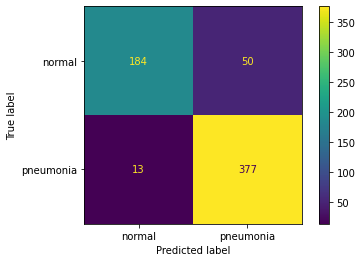

In [18]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred_test = model_1.predict(test_ds) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
flag = False 
for x , y in test_ds :
    if flag == False : 
       flag = True 
       sample_pic = x[1] 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = ["normal", "pneumonia"]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()

In [19]:
import numpy as np
from sklearn.metrics import precision_score, recall_score


# Calculate precision and recall
precision = precision_score(y_actual, y_pred_test, average='weighted')
recall = recall_score(y_actual, y_pred_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.9020687953969971
Recall: 0.8990384615384616


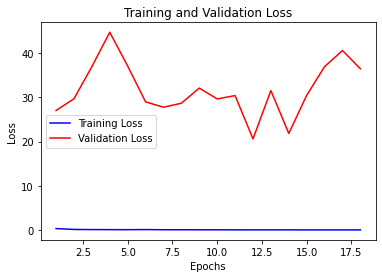

In [9]:
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing Architecture-2 
on validation and test data . 

In [10]:
test_loss, test_accuracy = model_2.evaluate(test_ds ,  batch_size=None, verbose="auto", callbacks=None)
print(test_loss)
print(test_accuracy)
val_loss, val_accuracy = model_2.evaluate(valid_ds ,  batch_size=None, verbose="auto", callbacks=None)
print(val_loss)
print(val_accuracy)

20/20 [==============================] - 2s 71ms/step - loss: 70.6169 - accuracy: 0.9135
70.61686706542969
0.9134615659713745
5/5 [==============================] - 0s 69ms/step - loss: 77.4839 - accuracy: 0.9462
77.48388671875
0.9461538195610046


20/20 [==============================] - 2s 76ms/step
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

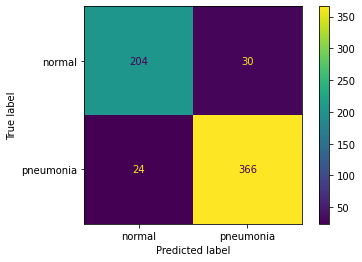

In [20]:

y_pred_test = model_2.predict(test_ds) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
for x , y in test_ds : 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = ["normal", "pneumonia"]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()

In [21]:
# Calculate precision and recall
precision = precision_score(y_actual, y_pred_test, average='weighted')
recall = recall_score(y_actual, y_pred_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9131778309409889
Recall: 0.9134615384615384


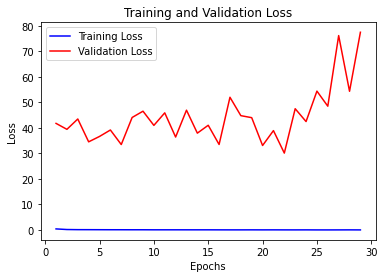

In [12]:
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Testing Architecture-3 
on validation and test data . 

In [13]:
test_loss, test_accuracy = model_3.evaluate(test_ds ,  batch_size=None, verbose="auto", callbacks=None)
print(test_loss)
print(test_accuracy)

val_loss, val_accuracy = model_3.evaluate(valid_ds ,  batch_size=None, verbose="auto", callbacks=None)
print(val_loss)
print(val_accuracy)


20/20 [==============================] - 2s 73ms/step - loss: 58.0416 - accuracy: 0.9103
58.041622161865234
0.9102563858032227
5/5 [==============================] - 1s 77ms/step - loss: 49.8320 - accuracy: 0.9385
49.83195877075195
0.9384615421295166


20/20 [==============================] - 2s 80ms/step
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

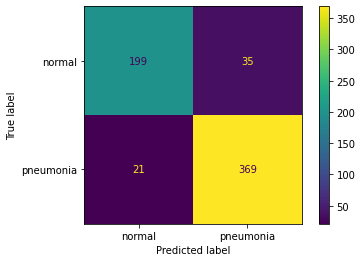

In [22]:

y_pred_test = model_3.predict(test_ds) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
for x , y in test_ds : 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = ["normal", "pneumonia"]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()

In [23]:
# Calculate precision and recall
precision = precision_score(y_actual, y_pred_test, average='weighted')
recall = recall_score(y_actual, y_pred_test, average='weighted')

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.9100585058505851
Recall: 0.9102564102564102


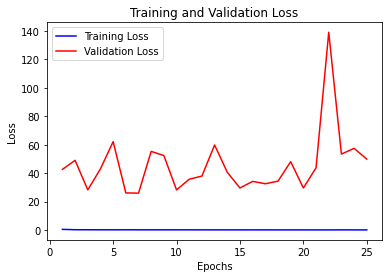

In [15]:
train_loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Text(0, 0.5, 'Test loss')

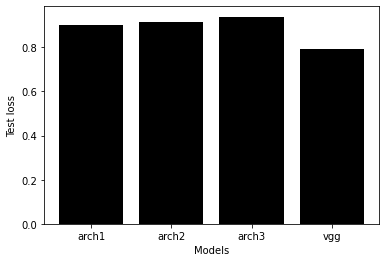

In [28]:
y=[0.8990,0.9135, 0.9385, 0.7933]
x=['arch1', 'arch2', 'arch3', 'vgg']
plt.bar(x,y,color='black')
plt.xlabel('Models')
plt.ylabel('Test loss')